### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

### Read and load Dataset into pandas DataFrame

In [3]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.isnull().mean()*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [6]:
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [7]:
df['hotel'].value_counts()/len(df['hotel'])*100

City Hotel      66.446101
Resort Hotel    33.553899
Name: hotel, dtype: float64

#### Bivariate Analysis of Hotel and is_cancelled column

hotel         is_canceled
City Hotel    0              46228
              1              33102
Resort Hotel  0              28938
              1              11122
Name: is_canceled, dtype: int64


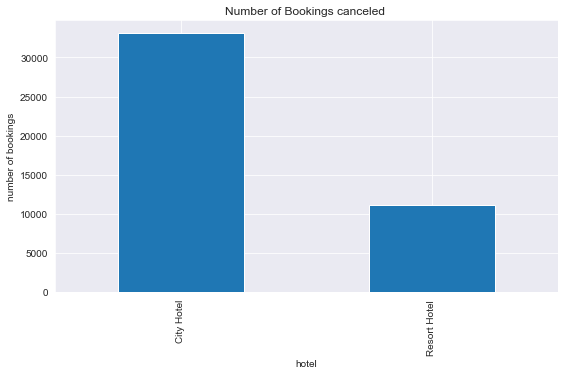

In [8]:
plt.figure(figsize=(9,5))
sns.set_style('darkgrid')
print(df.groupby('hotel')['is_canceled'].value_counts())
df.groupby('hotel')['is_canceled'].sum().plot.bar()
plt.title('Number of Bookings canceled ')
plt.ylabel('number of bookings')
plt.show()

####  => 70% of the bookings in City Hotel were canceled  and 37% of bookings in resort hotel were canceled 

Text(0.5, 1.0, 'Hotel')

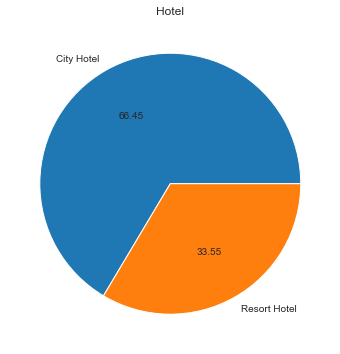

In [9]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
plt.pie(df['hotel'].value_counts(),labels=df['hotel'].value_counts().index,autopct='%0.02f')
plt.title('Hotel')

#### One Hot Encoding 

In [10]:
dummy = pd.get_dummies(df['hotel'],prefix='hotel')
df.drop('hotel',inplace=True,axis=1)
df = pd.concat([df,dummy],axis=1)
df.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,hotel_City Hotel,hotel_Resort Hotel
0,0,342,2015,July,27,1,0,0,2,0.0,...,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,1
1,0,737,2015,July,27,1,0,0,2,0.0,...,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,1
2,0,7,2015,July,27,1,0,1,1,0.0,...,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,0,1
3,0,13,2015,July,27,1,0,1,1,0.0,...,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,0,1
4,0,14,2015,July,27,1,0,2,2,0.0,...,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,0,1


In [11]:
df['lead_time'].isnull().mean()*100

0.0

#### Checking outliers

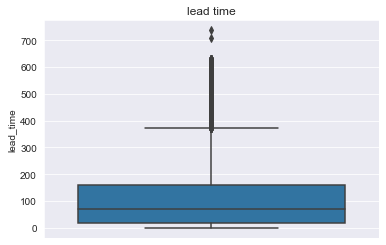

In [12]:
sns.boxplot(y=df['lead_time']);
plt.title('lead time')
plt.show()

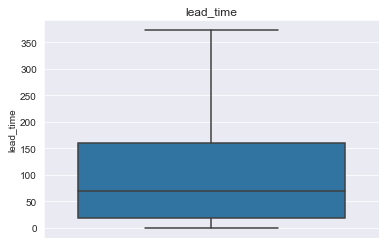

In [13]:
iqr = df['lead_time'].quantile(0.75) - df['lead_time'].quantile(0.25)
lower_range = df['lead_time'].quantile(0.25) - (iqr*1.5)
higher_range = df['lead_time'].quantile(0.75) + (iqr*1.5)
lower = df['lead_time'].quantile(0.25)
higher = df['lead_time'].quantile(0.75)
outlier_treated = np.where(df['lead_time'] > higher_range,higher,df['lead_time'])
df['lead_time'] = pd.DataFrame(outlier_treated)
outlier_treated = np.where(df['lead_time'] < lower_range,lower,df['lead_time'])
df['lead_time'] = pd.DataFrame(outlier_treated)
#verification
sns.boxplot(y = df['lead_time'])
plt.title('lead_time')
plt.show()